## Observations and Insights 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergedData = pd.merge(mouse_metadata, study_results, on='Mouse ID', how= 'left')
# Display the data table for preview
mergedData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
# Checking the number of mice.
mouseCount = mergedData["Mouse ID"].nunique()
mouseCount

249

In [76]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dupeID= mergedData.loc[mergedData.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupeID[0]

'g989'

In [77]:
# Optional: Get all the data for the duplicate mouse ID. 
dupedData = mergedData.loc[mergedData['Mouse ID']==dupeID[0]]
dupedData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [78]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouseClean_df = mergedData.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep= 'first')
mouseClean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [79]:
# Checking the number of mice in the clean DataFrame.
newMouseCount= mouseClean_df["Mouse ID"].nunique()
newMouseCount

249

## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugGroups=mouseClean_df.groupby('Drug Regimen') 
meanTVol = drugGroups["Tumor Volume (mm3)"].mean()
medianTVol = drugGroups["Tumor Volume (mm3)"].median()
varTVol = drugGroups["Tumor Volume (mm3)"].var()
stdTVol = drugGroups["Tumor Volume (mm3)"].std()
semTVol = drugGroups["Tumor Volume (mm3)"].sem()


drugGroups_df = pd.DataFrame({
                "Mean T Vol" : meanTVol,
                "Median T Vol" : medianTVol,
                "var T Vol" : varTVol,
                "std T Vol" :  stdTVol,
                "sem T Vol" : semTVol
})

drugGroups_df




,Mean T Vol,Median T Vol,var T Vol,std T Vol,sem T Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [81]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drugGroupsagg = mouseClean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
drugGroupsagg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
See Above Cells 
# This method produces everything in a single groupby function
See Above Cells 

SyntaxError: invalid syntax (<ipython-input-82-a4d687d419c0>, line 2)

## Bar and Pie Charts

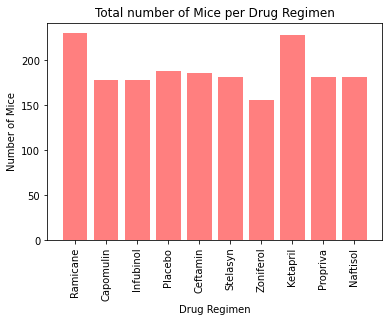

In [83]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#Create and identify values for axises 
treatments = mouseClean_df['Drug Regimen'].unique()
countMice = drugGroups["Mouse ID"].count()
x_axis = np.arange(len(treatments))
#Creaete bar and format chart
plt.bar(x_axis, countMice, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, treatments, rotation='vertical')
#create Chart Labels
plt.title("Total number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()


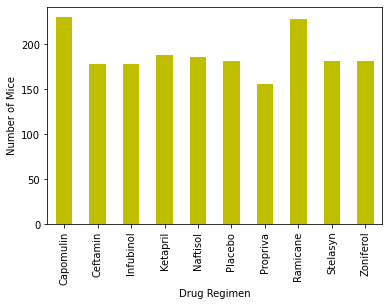

In [84]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Create a bar chart based off of the group series from before
countMiceChart= countMice.plot(kind='bar', color= 'y')
# Set the xlabel and ylabel using class methods
countMiceChart.set_xlabel("Drug Regimen")
countMiceChart.set_ylabel("Number of Mice")

plt.show()



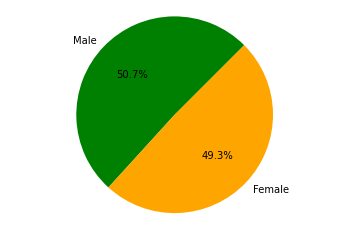

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#genderGroups=mouseClean_df.groupby('Sex')
countGenders = mouseClean_df['Sex'].value_counts()
Genders= ['Male','Female']
colors = ["green","orange"]
plt.pie(countGenders, labels=Genders, colors=colors,autopct="%1.1f%%", startangle=45)
plt.axis("equal")
countGenders
plt.show()

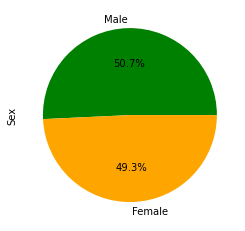

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = mouseClean_df.Sex.value_counts()
counts.plot(kind= 'pie',autopct='%1.1f%%', colors= colors )
plt.show()

## Quartiles, Outliers and Boxplots

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouseGroup = mouseClean_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouseGroupMerge = pd.merge(mouseClean_df, mouseGroup, how= 'right', on= ['Mouse ID', 'Timepoint'])
mouseGroupVol = mouseGroupMerge[['Mouse ID', 'Drug Regimen','Timepoint','Tumor Volume (mm3)']]
mouseGroupVol1 = mouseGroupVol.loc[mouseGroupVol['Drug Regimen'] == 'Capoumlin', :]
mouseGroupVol2 = mouseGroupVol.loc[mouseGroupVol['Drug Regimen'] == 'Ramicane', :]
mouseGroupVol3 = mouseGroupVol.loc[mouseGroupVol['Drug Regimen'] == 'Infubinol', :]
mouseGroupVol4 = mouseGroupVol.loc[mouseGroupVol['Drug Regimen'] == 'Ceftamin', :]

mouseGroupVol

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,45,22.050126
1,s185,Capomulin,45,23.343598
2,x401,Capomulin,45,28.484033
3,m601,Capomulin,45,28.430964
4,g791,Ramicane,45,29.128472
...,...,...,...,...
244,z314,Stelasyn,5,45.934712
245,z435,Propriva,10,48.710661
246,z581,Infubinol,45,62.754451
247,z795,Naftisol,45,65.741070


In [160]:
# Put treatments into a list for for loop (and later for plot labels)
KeyDrugs= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'] 

# Create empty list to fill with tumor vol data (for plotting)
tumorVolData= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for KeyDrug in KeyDrugs : 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    T_vol = mouseGroupVol.loc[mouseGroupVol["Drug Regimen"] == KeyDrug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumorVolData.append(T_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = T_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    

    #print(f"Outliers {Outliers_Tumor_Vol}")
    print(f"Results for the Drug {KeyDrug}")
    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("-----------------------------------------------------------")
    
#Outliers_Tumor_Vol = mouseClean_df.loc[(mouseGroupVol['Tumor Volume (mm3)']<lower_bound)] | mouseClean_df.loc[(mouseGroupVol['Tumor Volume (mm3)'] > upper_bound)]
#Outliers_Tumor_Vol()

Results for the Drug Capomulin
The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-----------------------------------------------------------
Results for the Drug Ramicane
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-----------------------------------------------------------
Results for the Drug Infubinol
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The 

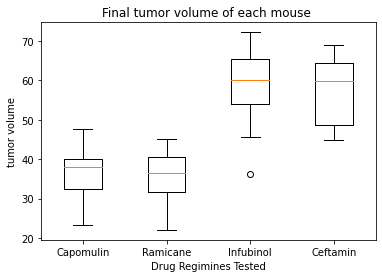

In [89]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumorVolData, labels= KeyDrugs)
plt.title('Final tumor volume of each mouse ')
plt.ylabel('tumor volume')
plt.xlabel(f"Drug Regimines Tested")
plt.show()

## Line and Scatter Plots

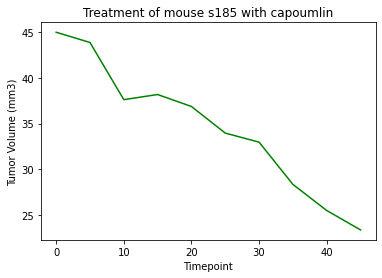

In [122]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_test_mouse = mouseClean_df.loc[mouseClean_df['Mouse ID']== 's185']
plt.plot(capomulin_test_mouse['Timepoint'], capomulin_test_mouse['Tumor Volume (mm3)'], color= 'g')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Treatment of mouse s185 with capoumlin')
plt.show()

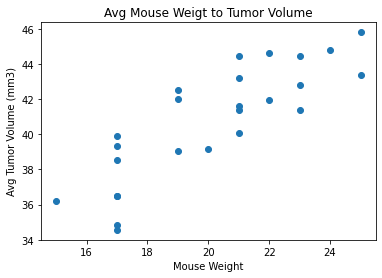

In [91]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_test_group = mouseClean_df.loc[mouseClean_df['Drug Regimen']== 'Capomulin']
capomulin_avg = capomulin_test_group.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.title('Avg Mouse Weigt to Tumor Volume')
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is: 0.84


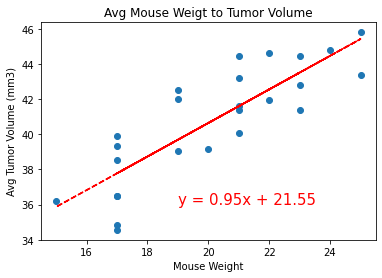

In [125]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

AvgWeight = capomulin_avg ["Weight (g)"]
AvgTvol = capomulin_avg ["Tumor Volume (mm3)"]
# Calculate the correlation coefficient 
CorrWeightTvol= round(st.pearsonr(AvgWeight,AvgTvol)[0],2)
#Create linegress equation
TV_slope, TV_int, TV_r, TV_p, TV_std_err = st.linregress(AvgWeight,AvgTvol)
TV_fit = TV_slope * AvgWeight + TV_int
line_eq = "y = " + str(round(TV_slope,2)) + "x + " + str(round(TV_int,2))
#plit scatter with linear regression model 
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.plot(AvgWeight, TV_fit, "--", color= 'r')
plt.annotate(line_eq,(19,36),fontsize=15,color='r')
plt.title('Avg Mouse Weigt to Tumor Volume')
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume (mm3)')
#outputs
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is: {CorrWeightTvol}")
plt.show()
